# HW5 Kaggle Competition #

### Libraries ###

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import files

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


### Kaggle ###

In [2]:
uploaded = files.upload()
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
#upload kaggle.json file which contains API Token

Saving kaggle.json to kaggle.json


In [3]:
!kaggle competitions download -c histopathologic-cancer-detection
with zipfile.ZipFile('/content/histopathologic-cancer-detection.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/histopathologic_dataset')

histopathologic-cancer-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


### Data ###

In [4]:
data = pd.read_csv('./histopathologic_dataset/train_labels.csv')  #create a dataframe of dataset

In [5]:
data.head() #display dataframe
#id: input, contains image file names
#label: output, presence of tumor

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


In [6]:
data['label'].value_counts() #determine number of each case
#0 = no tumor, 1 = tumor

0    130908
1     89117
Name: label, dtype: int64

In [7]:
data.info() #display info about dataframe
#id is of type object, label is of type int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220025 entries, 0 to 220024
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      220025 non-null  object
 1   label   220025 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.4+ MB


In [8]:
data.isnull().sum() #determine number of missing/NaN values in data
#no missing values in data

id       0
label    0
dtype: int64

### Exploratory Data Analysis ###

In [11]:
negative = data['label'].value_counts().get(0,0) #negative cases
print('Negative Cases:', negative)

positive = data['label'].value_counts().get(1,0) #positive cases
print('Positive Cases:', positive)

Negative Cases: 130908
Positive Cases: 89117


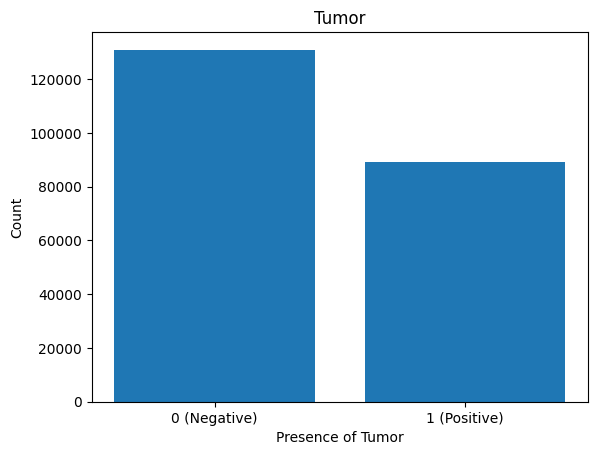

In [12]:
#plot a bar graph of negative and positive cases
plt.bar(['0 (Negative)', '1 (Positive)'], [negative, positive])
plt.title("Tumor")
plt.xlabel("Presence of Tumor")
plt.ylabel("Count")
plt.show()

### Reformat Labels ###

In [13]:
data_labels = data['label']

In [14]:
NUM_CAT = 2

print("Old Label Format:", data_labels[0]) # old label format

data_labels_ = tf.keras.utils.to_categorical(data_labels, NUM_CAT) #conversion

print("New Label Format:", data_labels_[0]) # new label format

Old Label Format: 0
New Label Format: [1. 0.]


### Build Model ###

In [15]:
model = tf.keras.Sequential() #create model
model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu, input_dim=9216)) #add layer
model.add(tf.keras.layers.Dense(NUM_CAT, activation=tf.nn.softmax)) #add layer
opt = tf.keras.optimizers.SGD(learning_rate=0.1) #optimize

#compile model
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

model.summary() #print model summary

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               4719104   
                                                                 
 dense_1 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 4720130 (18.01 MB)
Trainable params: 4720130 (18.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Train Model ###

In [16]:
data_images = data['id']

In [17]:
model.fit(data_images, data_labels_, epochs=5) #train model

Epoch 1/5


ValueError: ignored

### References:

* File: fashion-mnist-with-keras.ipynb
* Piazza Discussion: HW5 Discussion
* https://www.kaggle.com/code/akarshu121/cancer-detection-with-cnn-for-beginners
* https://www.geeksforgeeks.org/bar-plot-in-matplotlib/